In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is 
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier,plot_tree

url= "brain_stroke_in_numeric_without_useless_data.csv"
brain = pd.read_csv(url)
brain = brain.drop(brain.columns[0], axis=1)
brain_pca = pd.read_csv('brain_stroke_after_pca.csv')
brain_pca = brain_pca.drop(brain_pca.columns[0], axis=1) 
print(brain)

      gender   age  hypertension  heart_disease  ever_married  \
0          0  67.0             0              1             1   
1          0  80.0             0              1             1   
2          1  49.0             0              0             1   
3          1  79.0             1              0             1   
4          0  81.0             0              0             1   
...      ...   ...           ...            ...           ...   
4976       0  41.0             0              0             0   
4977       0  40.0             0              0             1   
4978       1  45.0             1              0             1   
4979       0  40.0             0              0             1   
4980       1  80.0             1              0             1   

      avg_glucose_level   bmi  smoking_status  stroke  
0                228.69  36.6               2       1  
1                105.92  32.5               1       1  
2                171.23  34.4               3      

In [3]:
# Linear Regression

In [4]:
X = brain.iloc[:, :8]
y = brain.iloc[:, 8]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

linear = LinearRegression()
y_pred = linear.fit(X_train, y_train).predict(X_test)
print("MSE:",mean_squared_error(y_test, y_pred))

MSE: 0.04514472417313834


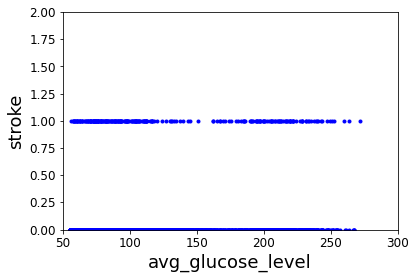

In [5]:
plt.plot(X.iloc[:, 5], y, "b.")
plt.xlabel("avg_glucose_level", fontsize=18)
plt.ylabel("stroke", fontsize=18)
plt.axis([50, 300, 0, 2])
plt.show()

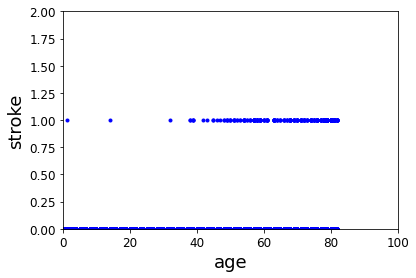

In [6]:
plt.plot(X.iloc[:, 1], y, "b.")
plt.xlabel("age", fontsize=18)
plt.ylabel("stroke", fontsize=18)
plt.axis([0, 100, 0, 2])
plt.show()

In [7]:
X = brain_pca.iloc[:, :2]
y = brain_pca.iloc[:, 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

linear = LinearRegression()
y_pred = linear.fit(X_train, y_train).predict(X_test)
print("MSE:",mean_squared_error(y_test,  y_pred))

MSE: 0.046745857214450195


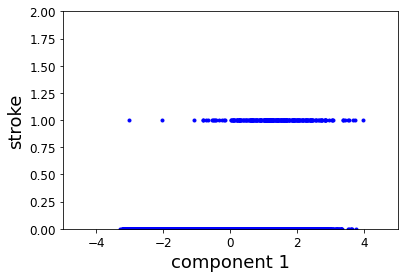

In [8]:
plt.plot(X.iloc[:, 0], y, "b.")
plt.xlabel("component 1", fontsize=18)
plt.ylabel("stroke", fontsize=18)
plt.axis([-5, 5, 0, 2])
plt.show()

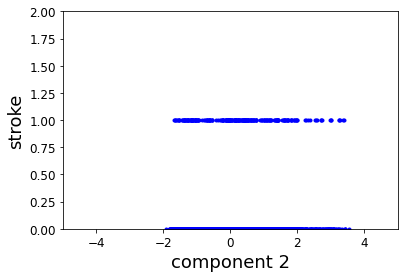

In [9]:
plt.plot(X.iloc[:, 1], y, "b.")
plt.xlabel("component 2", fontsize=18)
plt.ylabel("stroke", fontsize=18)
plt.axis([-5, 5, 0, 2])
plt.show()

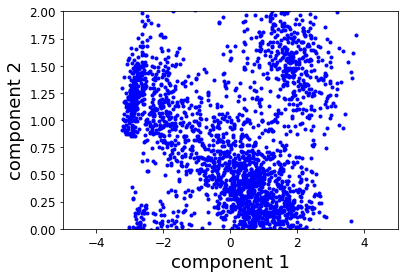

In [10]:
plt.plot(X.iloc[:, 0], X.iloc[:, 1], "b.")
plt.xlabel("component 1", fontsize=18)
plt.ylabel("component 2", fontsize=18)
plt.axis([-5, 5, 0, 2])
plt.show()

In [11]:
# MSE lower on our dataset with all numeric data than on pca, so we will use our dataset with numeric values.
# Our dataset is a classification dataset, and linear regression is not suitable for classification.
# We can see this with the different graphs (none of them has the possibility to apply a good fit line).
# Our data are not really linear separable, unless we apply a horizontal fit line (not a linear regression).

In [12]:
# Logistic Regression

In [13]:
X = brain.iloc[:, :8]
y = brain.iloc[:, 8]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression()
y_pred = log_reg.fit(X_train, y_train).predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("MSE:",mean_squared_error(y_test,  y_pred))

Accuracy: 0.9478260869565217
MSE: 0.05217391304347826


/home/lia/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
# the minimum number in sklearn is 100, so it's too low for our dataset with numerical value

In [15]:
# So with 1000 iteration, same accuracy but without error

In [16]:
X = brain.iloc[:, :8]
y = brain.iloc[:, 8]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
y_pred = log_reg.fit(X_train, y_train).predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("MSE:",mean_squared_error(y_test,  y_pred))

Accuracy: 0.9478260869565217
MSE: 0.05217391304347826


In [17]:
# metrics on the test set 

In [18]:
y_test_pred = cross_val_predict(log_reg, X_test, y_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
print("TN: %.0f" % tn + ", FP: %.0f" % fp + ", FN: %.0f" % fn + ", TP: %.0f" % tp)
print("Precision:",precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("f1 score:", f1_score(y_test, y_test_pred))

TN: 1414, FP: 3, FN: 72, TP: 6
Precision: 0.6666666666666666
Recall: 0.07692307692307693
f1 score: 0.13793103448275862


In [19]:
# metrics on the train set 

In [20]:
y_train_pred = cross_val_predict(log_reg, X_train, y_train)
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
print("TN: %.0f" % tn + ", FP: %.0f" % fp + ", FN: %.0f" % fn + ", TP: %.0f" % tp)
print("Precision:",precision_score(y_train, y_train_pred, zero_division=0))
print("Recall:", recall_score(y_train, y_train_pred, zero_division=0))
print("f1 score:", f1_score(y_train, y_train_pred, zero_division=0))

TN: 3316, FP: 0, FN: 170, TP: 0
Precision: 0.0
Recall: 0.0
f1 score: 0.0


In [21]:
# try with the pca dataset

In [22]:
X = brain_pca.iloc[:, :2]
y = brain_pca.iloc[:, 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression()
y_pred = log_reg.fit(X_train, y_train).predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("MSE:",mean_squared_error(y_test,  y_pred))

Accuracy: 0.9478260869565217
MSE: 0.05217391304347826


In [23]:
# Metrics on the test set 

In [24]:
y_test_pred = cross_val_predict(log_reg, X_test, y_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
print("TN: %.0f" % tn + ", FP: %.0f" % fp + ", FN: %.0f" % fn + ", TP: %.0f" % tp)
print("Precision:",precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("f1 score:", f1_score(y_test, y_test_pred))

TN: 1417, FP: 0, FN: 76, TP: 2
Precision: 1.0
Recall: 0.02564102564102564
f1 score: 0.05


In [25]:
# Metrics on the train set 

In [26]:
y_train_pred = cross_val_predict(log_reg, X_train, y_train)
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
print("TN: %.0f" % tn + ", FP: %.0f" % fp + ", FN: %.0f" % fn + ", TP: %.0f" % tp)
print("Precision:",precision_score(y_train, y_train_pred, zero_division=0))
print("Recall:", recall_score(y_train, y_train_pred, zero_division=0))
print("f1 score:", f1_score(y_train, y_train_pred, zero_division=0))

TN: 3316, FP: 0, FN: 170, TP: 0
Precision: 0.0
Recall: 0.0
f1 score: 0.0


In [27]:
X = brain.iloc[:, :8]
y = brain.iloc[:, 8]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
y_pred = log_reg.fit(X_train, y_train).predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("MSE:",mean_squared_error(y_test,  y_pred))

Accuracy: 0.9478260869565217
MSE: 0.05217391304347826


In [28]:
y_train_pred = cross_val_predict(log_reg, X_train, y_train)
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
print("TN: %.0f" % tn + ", FP: %.0f" % fp + ", FN: %.0f" % fn + ", TP: %.0f" % tp)
print("Precision:",precision_score(y_train, y_train_pred, zero_division=0))
print("Recall:", recall_score(y_train, y_train_pred, zero_division=0))
print("f1 score:", f1_score(y_train, y_train_pred, zero_division=0))

TN: 3316, FP: 0, FN: 170, TP: 0
Precision: 0.0
Recall: 0.0
f1 score: 0.0


In [29]:
# pca and data set with all the numerical value have the same accuracy 
# We are going to use our main dataset to have more inputs

In [30]:
X = brain.iloc[:, :8]
y = brain.iloc[:, 8]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = [
    LogisticRegression(solver='newton-cg',penalty='none',max_iter=1000),
    LogisticRegression(solver='lbfgs',penalty='none',max_iter=1000),
    LogisticRegression(solver='sag',penalty='none',max_iter=1000),
    LogisticRegression(solver='saga',penalty='none',max_iter=1000)
    ]
clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
for alg in clf:
        
    predicted = alg.fit(X_train, y_train).predict(X_test)
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 5)
    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 5)
    clf_compare.loc[row_index, 'Precission'] = round(precision_score(y_test, predicted, zero_division=0),5)
    clf_compare.loc[row_index, 'Recall'] = round(recall_score(y_test, predicted, zero_division=0),5)

    row_index+=1
    
clf_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
clf_compare

/home/lia/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/lia/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,Train Accuracy,Test Accuracy,Precission,Recall
0,0.95123,0.94783,0.0,0.0
1,0.95123,0.94783,0.0,0.0
2,0.95037,0.94783,0.0,0.0
3,0.95066,0.94783,0.0,0.0


In [31]:
# What we observe here is that regardless of the solver we choose, 
# the model metric improvement vs baseline is less than 0.001%.

In [32]:
clf = [
    LogisticRegression(solver='lbfgs',penalty='none',max_iter=100),
    LogisticRegression(solver='lbfgs',penalty='none',max_iter=1000),
    LogisticRegression(solver='lbfgs',penalty='none',max_iter=10000),
    LogisticRegression(solver='lbfgs',penalty='none',max_iter=100000)
    ]
clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
for alg in clf:
        
    predicted = alg.fit(X_train, y_train).predict(X_test)
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 5)
    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 5)
    clf_compare.loc[row_index, 'Precission'] = round(precision_score(y_test, predicted, zero_division=0),5)
    clf_compare.loc[row_index, 'Recall'] = round(recall_score(y_test, predicted, zero_division=0),5)

    row_index+=1
    
clf_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
clf_compare

/home/lia/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Train Accuracy,Test Accuracy,Precission,Recall
0,0.95123,0.94783,0.0,0.0
1,0.95123,0.94783,0.0,0.0
2,0.95123,0.94783,0.0,0.0
3,0.95123,0.94783,0.0,0.0


In [33]:
# What we observe here is that regardless of the max_iterations we choose, 
# the model metric improvement vs baseline is less than 0.001%.

In [34]:
clf = [
    LogisticRegression(solver='lbfgs',penalty='l2',max_iter=1000, C=0.001),
    LogisticRegression(solver='lbfgs',penalty='l2',max_iter=1000, C=0.010),
    LogisticRegression(solver='lbfgs',penalty='l2',max_iter=1000, C=0.100),
    LogisticRegression(solver='lbfgs',penalty='l2',max_iter=1000, C=1.000),
    LogisticRegression(solver='lbfgs',penalty='l2',max_iter=1000, C=10.000),
    LogisticRegression(solver='lbfgs',penalty='l2',max_iter=1000, C=100.000),
    ]
clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
for alg in clf:
        
    predicted = alg.fit(X_train, y_train).predict(X_test)
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 5)
    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 5)
    clf_compare.loc[row_index, 'Precission'] = round(precision_score(y_test, predicted, zero_division=0),5)
    clf_compare.loc[row_index, 'Recall'] = round(recall_score(y_test, predicted, zero_division=0),5)

    row_index+=1
    
clf_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
clf_compare

,Train Accuracy,Test Accuracy,Precission,Recall
0,0.95123,0.94783,0.0,0.0
1,0.95123,0.94783,0.0,0.0
2,0.95123,0.94783,0.0,0.0
3,0.95123,0.94783,0.0,0.0
4,0.95123,0.94783,0.0,0.0
5,0.95123,0.94783,0.0,0.0


In [35]:
# What we observe here is that regardless of the nverse of regularization strength  we choose, 
# the model metric improvement vs baseline is less than 0.001%.

In [36]:
# To explain all of this result : our dataset doesn't fit with logistic regression neither with linear regression